## Selección de atributos con wrappers

In [189]:
# https://www.analyticsvidhya.com/blog/2020/10/a-comprehensive-guide-to-feature-selection-using-wrapper-methods-in-python/

Existen 3 metodos a saber para realizar reducción de caracteristicas
- Filtros
- Wrappers o Envolturas
- Metodos integrados


!pip install mlxtend

In [1]:
# Cargadmos el dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
print(tf.__version__)

2.8.0


In [3]:
# Cargue de los datos
df = pd.read_excel("../Archivos Generados/DatasetFinal.xlsx")

In [4]:
df.head(5)

,ID_LOTE,TIPO_SIEMBRA,SEM_TRATADAS,MATERIAL_GENETICO,CULT_ANT,DRENAJE,METODO_COSECHA,ALMACENAMIENTO_FINCA,DIAS_EN_EMERGER,DIAS_EN_EMERGER_A_FLORECER,...,Temp_Max_Avg_Mad,Temp_Min_Avg_Mad,Temp_Avg_Mad,Diurnal_Range_Avg_Mad,Sol_Ener_Accu_Mad,Temp_Max_34_Freq_Mad,Rain_Accu_Mad,Rain_10_Freq_Mad,Rhum_Avg_Mad,RDT_AJUSTADO
0,40,Mecanizado,NO,PIONEER 30F32,Algodon,SI,Manual,NO,5,63,...,32.05,23.60,27.83,8.45,13197.57,0.05,279.3,0.23,82.41,4767.44
1,43,Mecanizado,SI,DK 234,Maiz,SI,Manual,NO,5,64,...,32.37,23.49,27.93,8.89,12436.49,0.03,221.2,0.26,81.86,4651.16
2,44,Mecanizado,NO,PIONEER 30F32,Algodon,SI,Manual,NO,5,59,...,32.17,23.53,27.85,8.63,11267.17,0.03,226.0,0.27,82.61,5180.23
3,45,Mecanizado,NO,Otro,Algodon,SI,Manual,NO,5,64,...,32.19,23.54,27.86,8.65,11066.68,0.03,223.2,0.29,81.84,4897.67
4,46,Mecanizado,NO,Otro,Algodon,SI,Manual,NO,5,63,...,32.19,23.54,27.86,8.65,11066.68,0.03,223.2,0.29,81.84,5302.33


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 799 entries, 0 to 798
Columns: 116 entries, ID_LOTE to RDT_AJUSTADO
dtypes: float64(55), int64(31), object(30)
memory usage: 724.2+ KB


In [6]:
# Selección de las variables categoricas
cat_features = df.select_dtypes(include = ["object", "category"]).columns
cat_features

Index(['TIPO_SIEMBRA', 'SEM_TRATADAS', 'MATERIAL_GENETICO', 'CULT_ANT',
       'DRENAJE', 'METODO_COSECHA', 'ALMACENAMIENTO_FINCA',
       'TERRENO_CIRCUN_RASTA', 'POSICION_PERFIL_RASTA', 'PEDREG_PERFIL_ROCAS',
       'CAP_ENDURE_RASTA', 'MOTEADOS_RASTA', 'MOTEADOS_MAS70cm._RASTA',
       'ESTRUCTURA_RASTA', 'OBSERVA_EROSION_RASTA', 'OBSERVA_MOHO_RASTA',
       'OBSERVA_COSTRAS_DURAS_RASTA', 'SITIO_EXPUESTO_SOL_RASTA',
       'OBSERVA_COSTRAS_BLANCAS_RASTA', 'OBSERVA_COSTAS_NEGRAS_RASTA',
       'REGION_SECA_ARIDA_RASTA', 'OBSERVA_RAICES_VIVAS_RASTA',
       'OBSERVA_PLANTAS_PEQUENAS_RASTA', 'OBSERVA_HOJARASCA_MO_RASTA',
       'SUELO_NEGRO_BLANDO_RASTA', 'CUCHILLO_PRIMER_HTE_RASTA',
       'CERCA_RIOS_QUEBRADAS_RASTA', 'RECUBRIMIENTO_VEGETAL__SUELO_RASTA',
       'd.interno', 'drenaje_externo'],
      dtype='object')

In [7]:
# Una vez las variables categoricas seleccionadas se realiza la conversion a formato dummy
df_cat = pd.get_dummies(df[cat_features], drop_first = True, dummy_na = True)
df_cat.head()

,TIPO_SIEMBRA_Mecanizado,TIPO_SIEMBRA_nan,SEM_TRATADAS_SI,SEM_TRATADAS_nan,MATERIAL_GENETICO_ADV 9339 (Syngenta),MATERIAL_GENETICO_CORPOICA V 114,MATERIAL_GENETICO_Cerato (Syngenta),MATERIAL_GENETICO_DK 1040,MATERIAL_GENETICO_DK 1596,MATERIAL_GENETICO_DK 234,...,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_ESPACIADO,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_MUY BUENO,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_REGULAR,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_SIN COBERTURA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_nan,d.interno_EXCESIVO,d.interno_LENTO A MUY LENTO,d.interno_nan,drenaje_externo_NINGUNO,drenaje_externo_nan
0,1,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [9]:
# Hay que eliminar las caracteristicas originales del dataframe principal
df.drop(cat_features, axis = 1, inplace = True)

In [10]:
# Agrego las nuevas variables  a la vista minable y finalmente relizo el proceso de los wrappers
df_final = pd.concat([df,df_cat], axis = 1)

In [11]:
df_final

,ID_LOTE,DIAS_EN_EMERGER,DIAS_EN_EMERGER_A_FLORECER,DIAS_EN_FLORECER_A_COSECHAR,POBLACION_20DIAS_AJT,ALTURA_LOT,ContEnfQui_Emer_Flor,ContEnfQui_Flor_Cose,ContMalMec_Siem_Emer,ContMalMec_Emer_Flor,...,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_ESPACIADO,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_MUY BUENO,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_REGULAR,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_SIN COBERTURA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_nan,d.interno_EXCESIVO,d.interno_LENTO A MUY LENTO,d.interno_nan,drenaje_externo_NINGUNO,drenaje_externo_nan
0,40,5,63,68,60000,13,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,43,5,64,63,60000,15,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,44,5,59,66,60000,12,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,45,5,64,59,60000,12,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,46,5,63,60,60000,16,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,4378,7,47,84,70000,18,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
795,4379,5,47,81,62000,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
796,4380,6,49,79,61000,17,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
797,4382,7,48,95,65000,17,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [12]:
Y = df_final.RDT_AJUSTADO
X = df_final.drop(["RDT_AJUSTADO"], axis=1)

In [13]:
X

,ID_LOTE,DIAS_EN_EMERGER,DIAS_EN_EMERGER_A_FLORECER,DIAS_EN_FLORECER_A_COSECHAR,POBLACION_20DIAS_AJT,ALTURA_LOT,ContEnfQui_Emer_Flor,ContEnfQui_Flor_Cose,ContMalMec_Siem_Emer,ContMalMec_Emer_Flor,...,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_ESPACIADO,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_MUY BUENO,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_REGULAR,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_SIN COBERTURA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_nan,d.interno_EXCESIVO,d.interno_LENTO A MUY LENTO,d.interno_nan,drenaje_externo_NINGUNO,drenaje_externo_nan
0,40,5,63,68,60000,13,0,0,0,0,...,0,1,0,0,0,0,1,0,1,0
1,43,5,64,63,60000,15,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
2,44,5,59,66,60000,12,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,45,5,64,59,60000,12,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,46,5,63,60,60000,16,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,4378,7,47,84,70000,18,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
795,4379,5,47,81,62000,16,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
796,4380,6,49,79,61000,17,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
797,4382,7,48,95,65000,17,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


## Wrappers - Selección de Caracteristicas.

In [18]:
# Implementación Wrappers
# Foward selections
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=10,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 10)

In [19]:
sfs.fit(X, Y)

SequentialFeatureSelector(cv=10, estimator=LinearRegression(), k_features=10,
                          scoring='r2')

In [20]:
tw_best_atri = sfs.k_feature_names_ 

In [21]:
tw_best_atri

('ContMalMec_Emer_Flor',
 'PROFUND_RAICES_VIVAS_RASTA',
 'Rain_Accu_For',
 'Rain_10_Freq_For',
 'Temp_Min_Avg_Mad',
 'METODO_COSECHA_Mecanizada',
 'REGION_SECA_ARIDA_RASTA_SI',
 'OBSERVA_RAICES_VIVAS_RASTA_SI',
 'OBSERVA_PLANTAS_PEQUENAS_RASTA_PLANTAS NORMALES',
 'OBSERVA_PLANTAS_PEQUENAS_RASTA_POCO AFECTADAS')

## Implementación Redes Neuronales

### Analisis 20 caracteristicas mas relevantes


In [206]:
X_20 = X[list(tw_best_atri)]
X_20

,ContMalMec_Emer_Flor,TotN_Emer_Flor,TotP_Siem_Emer,FerOrg_Emer_Flor,PROFUND_RAICES_VIVAS_RASTA,Porc_A,Rain_Accu_For,Rain_10_Freq_For,Temp_Min_Avg_Mad,Temp_Avg_Mad,MATERIAL_GENETICO_DK 234,MATERIAL_GENETICO_PAC 105,MATERIAL_GENETICO_PIONEER 30F35,METODO_COSECHA_Mecanizada,OBSERVA_COSTRAS_BLANCAS_RASTA_POCO MARCADAS,REGION_SECA_ARIDA_RASTA_SI,OBSERVA_RAICES_VIVAS_RASTA_SI,OBSERVA_PLANTAS_PEQUENAS_RASTA_PLANTAS NORMALES,OBSERVA_PLANTAS_PEQUENAS_RASTA_POCO AFECTADAS,drenaje_externo_NINGUNO
0,0,46.0,0.0,0,-1,0,305.1,0.17,23.60,27.83,0,0,0,0,0,0,0,1,0,1
1,0,92.0,0.0,0,-1,0,271.2,0.14,23.49,27.93,1,0,0,0,0,0,0,1,0,1
2,0,46.0,0.0,0,30,0,286.9,0.16,23.53,27.85,0,0,0,0,0,0,1,1,0,1
3,0,46.0,0.0,0,-1,0,282.1,0.16,23.54,27.86,0,0,0,0,0,0,0,1,0,1
4,0,46.0,0.0,0,-1,0,282.1,0.16,23.54,27.86,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
794,0,138.0,0.0,0,38,0,216.1,0.14,22.78,27.72,0,0,0,1,0,0,1,1,0,0
795,0,99.0,0.0,0,20,0,127.8,0.07,23.64,27.74,0,0,0,0,0,0,1,1,0,0
796,0,120.5,0.0,0,27,0,239.0,0.16,22.49,27.24,0,0,0,0,0,0,1,0,1,0
797,0,115.0,0.0,0,31,0,239.0,0.16,22.76,27.45,0,0,0,0,0,0,1,0,1,1


In [207]:
# Conteo de nuelos del conjunto de datos
X_20.isna().sum()

ContMalMec_Emer_Flor                               0
TotN_Emer_Flor                                     0
TotP_Siem_Emer                                     0
FerOrg_Emer_Flor                                   0
PROFUND_RAICES_VIVAS_RASTA                         0
Porc_A                                             0
Rain_Accu_For                                      0
Rain_10_Freq_For                                   0
Temp_Min_Avg_Mad                                   0
Temp_Avg_Mad                                       0
MATERIAL_GENETICO_DK 234                           0
MATERIAL_GENETICO_PAC 105                          0
MATERIAL_GENETICO_PIONEER 30F35                    0
METODO_COSECHA_Mecanizada                          0
OBSERVA_COSTRAS_BLANCAS_RASTA_POCO MARCADAS        0
REGION_SECA_ARIDA_RASTA_SI                         0
OBSERVA_RAICES_VIVAS_RASTA_SI                      0
OBSERVA_PLANTAS_PEQUENAS_RASTA_PLANTAS NORMALES    0
OBSERVA_PLANTAS_PEQUENAS_RASTA_POCO AFECTADAS 

In [208]:
# Division de los datos de entrenamiento y test (Entrenamiento: 70% , test:30%)
X_train_20, X_test_20, y_train, y_test = train_test_split(X_20, Y, test_size=0.3, random_state=42)

In [209]:
# Verificacion division de los datos
y_test

695    7063.95
666    7246.51
63     4709.30
533    5116.28
66     3767.44
        ...   
220    3627.91
450    5018.60
380    4000.00
132    3534.88
375    4081.40
Name: RDT_AJUSTADO, Length: 240, dtype: float64

In [210]:
X_train_20

,ContMalMec_Emer_Flor,TotN_Emer_Flor,TotP_Siem_Emer,FerOrg_Emer_Flor,PROFUND_RAICES_VIVAS_RASTA,Porc_A,Rain_Accu_For,Rain_10_Freq_For,Temp_Min_Avg_Mad,Temp_Avg_Mad,MATERIAL_GENETICO_DK 234,MATERIAL_GENETICO_PAC 105,MATERIAL_GENETICO_PIONEER 30F35,METODO_COSECHA_Mecanizada,OBSERVA_COSTRAS_BLANCAS_RASTA_POCO MARCADAS,REGION_SECA_ARIDA_RASTA_SI,OBSERVA_RAICES_VIVAS_RASTA_SI,OBSERVA_PLANTAS_PEQUENAS_RASTA_PLANTAS NORMALES,OBSERVA_PLANTAS_PEQUENAS_RASTA_POCO AFECTADAS,drenaje_externo_NINGUNO
404,0,61.0,0.0,0,22,0,122.4,0.07,24.96,29.15,0,0,0,1,0,0,1,1,0,1
522,0,46.0,0.0,0,13,0,235.7,0.14,22.74,27.62,0,0,0,0,0,0,1,1,0,1
748,0,80.5,0.0,0,39,0,245.1,0.16,22.44,27.24,0,0,0,0,0,0,1,1,0,0
426,0,80.0,0.0,0,23,0,109.7,0.05,24.01,29.50,0,0,0,1,0,0,1,1,0,0
41,0,46.0,23.0,0,32,0,341.2,0.19,23.82,28.22,0,0,0,1,0,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0,115.0,0.0,0,27,0,137.6,0.07,23.39,28.74,0,0,0,0,0,0,1,1,0,0
106,0,0.0,23.0,0,33,0,317.6,0.21,24.57,28.96,0,0,0,1,0,0,1,1,0,0
270,0,115.0,0.0,0,-1,0,306.6,0.19,24.57,29.01,0,0,0,0,0,1,0,0,0,1
435,0,92.0,0.0,0,20,0,163.8,0.07,24.90,28.71,0,0,0,0,1,0,1,1,0,1


In [211]:
# Normalización de los datos
X_train_20_stats = X_train_20.describe()
X_train_20_stats = X_train_20_stats.transpose()
X_train_20_stats

,count,mean,std,min,25%,50%,75%,max
ContMalMec_Emer_Flor,559.0,0.003578,0.059761,0.00,0.000,0.00,0.00,1.00
TotN_Emer_Flor,559.0,90.151610,40.094007,0.00,69.000,92.00,98.60,276.00
TotP_Siem_Emer,559.0,1.192755,5.064622,0.00,0.000,0.00,0.00,40.00
FerOrg_Emer_Flor,559.0,0.001789,0.042295,0.00,0.000,0.00,0.00,1.00
PROFUND_RAICES_VIVAS_RASTA,559.0,24.858676,9.749721,-1.00,20.000,24.00,31.00,60.00
Porc_A,559.0,0.125224,2.960685,0.00,0.000,0.00,0.00,70.00
Rain_Accu_For,559.0,246.392737,76.965759,6.40,215.100,248.50,306.20,424.40
Rain_10_Freq_For,559.0,0.144812,0.047763,0.00,0.120,0.16,0.17,0.22
Temp_Min_Avg_Mad,559.0,23.831485,0.846553,22.34,22.955,24.17,24.54,25.14
Temp_Avg_Mad,559.0,28.364490,0.676328,27.09,27.615,28.68,28.94,29.63


In [212]:
# Estadisticas variable de salida
y_train_stas = y_train.describe()
y_train_stas = y_train_stas.transpose()
y_train_stas

count     559.000000
mean     4774.186476
std      1360.838864
min      1032.560000
25%      3788.370000
50%      4868.600000
75%      5797.675000
max      7913.950000
Name: RDT_AJUSTADO, dtype: float64

In [213]:
# Contrucción del modelo con 2 capas Densas | unica salida
def build_model(dataset):
  model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[len(dataset.keys())]),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
  ])

  optimizer = tf.keras.optimizers.Adam(0.001)

  model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
  return model

In [214]:
def plot_history(history):
  hist = pd.DataFrame(history.history)
  hist['epoch'] = history.epoch

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [RDT_AJS]')
  plt.plot(hist['epoch'], hist['mae'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mae'],
           label = 'Val Error')
  #plt.ylim([0,5])
  plt.legend()

  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Square Error [RDT_AJS]')
  plt.plot(hist['epoch'], hist['mse'],
           label='Train Error')
  plt.plot(hist['epoch'], hist['val_mse'],
           label = 'Val Error')
  #plt.ylim([0,20])
  plt.legend()
  plt.show()

In [215]:
# Normalización del conjunto de entrenamiento y test
def norm(x):
  print(x.shape)
  return (x - X_train_20_stats['mean']) / X_train_20_stats['std']


def norm_salida(x):
  print(x.shape)
  return (x - y_train_stas['mean']) / y_train_stas['std']


In [216]:
# Normalizacion de los datos
normed_train_20_data = norm(X_train_20)
normed_test_20_data = norm(X_test_20)
#y_train_normalized = norm_salida(y_train)
#y_test_normalized = norm_salida(y_test)

(559, 20)
(240, 20)


In [217]:
# Verificación de las normalización conjunto de netrenamiento
normed_train_20_data

,ContMalMec_Emer_Flor,TotN_Emer_Flor,TotP_Siem_Emer,FerOrg_Emer_Flor,PROFUND_RAICES_VIVAS_RASTA,Porc_A,Rain_Accu_For,Rain_10_Freq_For,Temp_Min_Avg_Mad,Temp_Avg_Mad,MATERIAL_GENETICO_DK 234,MATERIAL_GENETICO_PAC 105,MATERIAL_GENETICO_PIONEER 30F35,METODO_COSECHA_Mecanizada,OBSERVA_COSTRAS_BLANCAS_RASTA_POCO MARCADAS,REGION_SECA_ARIDA_RASTA_SI,OBSERVA_RAICES_VIVAS_RASTA_SI,OBSERVA_PLANTAS_PEQUENAS_RASTA_PLANTAS NORMALES,OBSERVA_PLANTAS_PEQUENAS_RASTA_POCO AFECTADAS,drenaje_externo_NINGUNO
404,-0.059869,-0.727081,-0.235507,-0.042295,-0.293206,-0.042295,-1.611012,-1.566328,1.333071,1.161433,-0.384161,-0.220665,-0.134842,1.530721,-0.258214,-0.134842,0.211612,0.533430,-0.428943,0.734152
522,-0.059869,-1.101202,-0.235507,-0.042295,-1.216309,-0.042295,-0.138928,-0.100751,-1.289329,-1.100783,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,0.533430,-0.428943,0.734152
748,-0.059869,-0.240725,-0.235507,-0.042295,1.450434,-0.042295,-0.016796,0.317985,-1.643707,-1.662641,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,0.533430,-0.428943,-1.359679
426,-0.059869,-0.253195,-0.235507,-0.042295,-0.190639,-0.042295,-1.776020,-1.985064,0.210873,1.678934,-0.384161,-0.220665,-0.134842,1.530721,-0.258214,-0.134842,0.211612,0.533430,-0.428943,-1.359679
41,-0.059869,-1.101202,4.305800,-0.042295,0.732464,-0.042295,1.231811,0.946089,-0.013567,-0.213639,-0.384161,-0.220665,-0.134842,1.530721,-0.258214,-0.134842,0.211612,0.533430,-0.428943,0.734152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-0.059869,0.619753,-0.235507,-0.042295,0.219629,-0.042295,-1.413521,-1.566328,-0.521509,0.555219,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,0.533430,-0.428943,-1.359679
106,-0.059869,-2.248506,4.305800,-0.042295,0.835031,-0.042295,0.925181,1.364825,0.872379,0.880505,-0.384161,-0.220665,-0.134842,1.530721,-0.258214,-0.134842,0.211612,0.533430,-0.428943,-1.359679
270,-0.059869,0.619753,-0.235507,-0.042295,-2.652248,-0.042295,0.782260,0.946089,0.872379,0.954433,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,7.402823,-4.717180,-1.871307,-0.428943,0.734152
435,-0.059869,0.046101,-0.235507,-0.042295,-0.498340,-0.042295,-1.073110,-1.566328,1.262196,0.510861,-0.384161,-0.220665,-0.134842,-0.652118,3.865831,-0.134842,0.211612,0.533430,-0.428943,0.734152


In [218]:
# Verificación de la normalización salida
y_train_normalized

404   -0.004958
522   -0.004958
748    0.609406
426    0.298377
41     1.101580
         ...   
71    -0.671436
106    1.361332
270   -2.308595
435    0.108686
102   -0.914110
Name: RDT_AJUSTADO, Length: 559, dtype: float64

In [219]:
# Contrucción del modelo
model20 = build_model(X_train_20)

In [220]:
# Resumen del modelo
model20.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 64)                1344      
                                                                 
 dense_25 (Dense)            (None, 64)                4160      
                                                                 
 dense_26 (Dense)            (None, 1)                 65        
                                                                 
Total params: 5,569
Trainable params: 5,569
Non-trainable params: 0
_________________________________________________________________


In [221]:
example_batch = normed_train_20_data[:10]
example_result = model20.predict(example_batch)
example_result

array([[0.3064603 ],
       [0.05926996],
       [0.16959533],
       [0.12399954],
       [0.60786974],
       [0.05335014],
       [0.07103032],
       [0.07753861],
       [0.36202222],
       [0.54883575]], dtype=float32)

In [222]:
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model20.fit(
                  normed_train_20_data,
                  y_train,
                  epochs=EPOCHS, 
                  validation_split = 0.2, 
                  #verbose=0,
                  callbacks=[PrintDot()])

Epoch 1/1000
14/14 [==============================] - 1s 32ms/step - loss: 24672518.0000 - mae: 4773.6489 - mse: 24672518.0000 - val_loss: 24472204.0000 - val_mae: 4771.3311 - val_mse: 24472204.0000
Epoch 2/1000
14/14 [==============================] - 0s 7ms/step - loss: 24658706.0000 - mae: 4772.1577 - mse: 24658706.0000 - val_loss: 24455490.0000 - val_mae: 4769.5659 - val_mse: 24455490.0000
Epoch 3/1000
14/14 [==============================] - 0s 5ms/step - loss: 24639108.0000 - mae: 4770.0601 - mse: 24639108.0000 - val_loss: 24430842.0000 - val_mae: 4766.9702 - val_mse: 24430842.0000
Epoch 4/1000
 1/14 [=>............................] - ETA: 0s - loss: 22122866.0000 - mae: 4511.5547 - mse: 22122866.0000

14/14 [==============================] - 0s 5ms/step - loss: 24609338.0000 - mae: 4766.9341 - mse: 24609338.0000 - val_loss: 24393778.0000 - val_mae: 4763.1128 - val_mse: 24393778.0000
Epoch 5/1000
14/14 [==============================] - 0s 5ms/step - loss: 24565588.0000 - mae: 4762.2876 - mse: 24565588.0000 - val_loss: 24339042.0000 - val_mae: 4757.4619 - val_mse: 24339042.0000
Epoch 6/1000
14/14 [==============================] - 0s 9ms/step - loss: 24501768.0000 - mae: 4755.6763 - mse: 24501768.0000 - val_loss: 24262078.0000 - val_mae: 4749.5474 - val_mse: 24262078.0000
Epoch 7/1000
14/14 [==============================] - 0s 8ms/step - loss: 24411480.0000 - mae: 4746.3774 - mse: 24411480.0000 - val_loss: 24156294.0000 - val_mae: 4738.7271 - val_mse: 24156294.0000
Epoch 8/1000
14/14 [==============================] - 0s 9ms/step - loss: 24289652.0000 - mae: 4733.9082 - mse: 24289652.0000 - val_loss: 24014502.0000 - val_mae: 4724.3423 - val_mse: 24014502.0000
Epoch 9/1000
14/14 [===

In [223]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,383932.09375,454.737091,383932.09375,828209.5625,672.997131,828209.5625,995
996,383211.71875,454.319641,383211.71875,827919.8750,672.218628,827919.8750,996
997,383685.68750,454.341675,383685.68750,828677.6875,673.003113,828677.6875,997
998,383064.96875,454.297607,383064.96875,829825.6875,673.576660,829825.6875,998
999,382917.68750,454.265686,382917.68750,828048.6250,671.953979,828048.6250,999


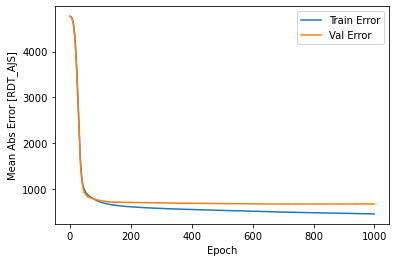

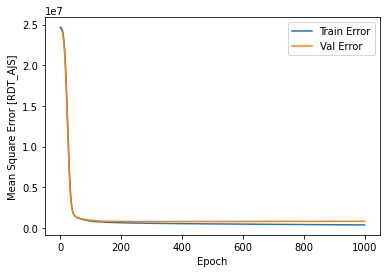

In [224]:
plot_history(history)

In [225]:
# Se incluye el parametro early stop para detener el entrenamiento en caso de no mejorar
# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=100)


In [226]:
loss, mae, mse = model20.evaluate(normed_test_20_data, y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} RDT-Ajust".format(mae))

8/8 - 0s - loss: 873899.9375 - mae: 697.4791 - mse: 873899.9375 - 39ms/epoch - 5ms/step


Testing set Mean Abs Error: 697.48 RDT-Ajust


In [227]:
normed_test_20_data

,ContMalMec_Emer_Flor,TotN_Emer_Flor,TotP_Siem_Emer,FerOrg_Emer_Flor,PROFUND_RAICES_VIVAS_RASTA,Porc_A,Rain_Accu_For,Rain_10_Freq_For,Temp_Min_Avg_Mad,Temp_Avg_Mad,MATERIAL_GENETICO_DK 234,MATERIAL_GENETICO_PAC 105,MATERIAL_GENETICO_PIONEER 30F35,METODO_COSECHA_Mecanizada,OBSERVA_COSTRAS_BLANCAS_RASTA_POCO MARCADAS,REGION_SECA_ARIDA_RASTA_SI,OBSERVA_RAICES_VIVAS_RASTA_SI,OBSERVA_PLANTAS_PEQUENAS_RASTA_PLANTAS NORMALES,OBSERVA_PLANTAS_PEQUENAS_RASTA_POCO AFECTADAS,drenaje_externo_NINGUNO
695,-0.059869,-0.527550,-0.235507,-0.042295,0.014495,-0.042295,-0.331222,-0.100751,-1.230266,-1.322569,-0.384161,-0.220665,-0.134842,1.530721,-0.258214,-0.134842,0.211612,0.533430,-0.428943,0.734152
666,-0.059869,0.619753,-0.235507,-0.042295,0.117062,-0.042295,-0.096052,0.317985,-1.643707,-1.573926,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,0.533430,-0.428943,-1.359679
63,-0.059869,-0.527550,4.305800,-0.042295,0.732464,-0.042295,1.259096,-0.519488,-0.025379,-0.184068,-0.384161,-0.220665,-0.134842,1.530721,-0.258214,-0.134842,0.211612,0.533430,-0.428943,0.734152
533,-0.059869,0.619753,-0.235507,-0.042295,0.835031,-0.042295,-0.016796,0.317985,-1.643707,-1.662641,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,0.533430,-0.428943,-1.359679
66,-0.059869,0.046101,-0.235507,-0.042295,2.168403,-0.042295,0.231366,-0.519488,-0.379757,0.451719,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,0.533430,-0.428943,-1.359679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,-0.059869,1.767057,-0.235507,-0.042295,1.142733,-0.042295,0.782260,0.946089,0.907817,1.057933,-0.384161,4.523641,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,-1.871307,-0.428943,0.734152
450,-0.059869,0.046101,-0.235507,-0.042295,-0.498340,-0.042295,-1.829291,-1.147592,1.262196,0.629147,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,0.533430,-0.428943,0.734152
380,-0.059869,3.488012,-0.235507,-0.042295,-0.088072,-0.042295,0.474331,0.527353,0.884192,0.865719,-0.384161,-0.220665,-0.134842,-0.652118,-0.258214,-0.134842,0.211612,-1.871307,2.327140,0.734152
132,-0.059869,-1.101202,3.555497,-0.042295,1.553001,-0.042295,-0.249367,-0.519488,0.577064,0.717862,2.598420,-0.220665,-0.134842,1.530721,-0.258214,-0.134842,0.211612,0.533430,-0.428943,-1.359679


In [228]:
# Finalmente se realizan las predicciónes
test_predictions = model20.predict(normed_test_20_data).flatten()
test_predictions


array([6218.094 , 6464.2397, 5397.394 , 6470.02  , 4545.4307, 6369.9053,
       5531.011 , 3929.8962, 6419.2915, 4574.648 , 4253.541 , 4145.566 ,
       5195.739 , 4095.8428, 3695.6243, 3682.5376, 3953.1433, 3722.9702,
       5724.13  , 5953.059 , 6442.913 , 4403.614 , 6200.0347, 6173.1206,
       4553.813 , 4013.3362, 3240.786 , 5958.6323, 6420.976 , 5608.5757,
       4466.6987, 4767.6187, 5465.7324, 4053.2576, 5862.6665, 4063.3035,
       6035.56  , 3921.942 , 5452.57  , 6700.9756, 6385.7383, 2655.6746,
       4438.5835, 4627.814 , 6364.36  , 5797.0586, 4464.4595, 5085.0503,
       5974.756 , 5081.274 , 2711.3003, 2704.5393, 6319.4487, 4077.2595,
       3590.6182, 3116.4504, 4235.152 , 3902.5173, 2669.842 , 3311.3538,
       1713.8234, 5794.7637, 6698.735 , 4460.5835, 3808.0076, 4902.279 ,
       4598.5835, 6467.229 , 5210.4243, 4096.82  , 6014.108 , 2283.522 ,
       5917.7104, 5002.745 , 3841.1917, 2007.4789, 3731.3813, 3869.569 ,
       5701.982 , 5492.9214, 4409.962 , 3423.836 , 

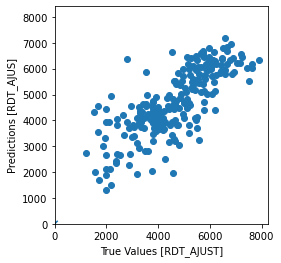

In [229]:
# Grafico valores predichos vs Valore reales
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [RDT_AJUST]')
plt.ylabel('Predictions [RDT_AJUS]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])

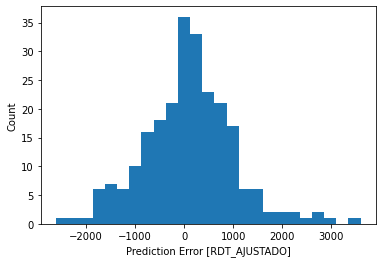

In [230]:
# Distribución de errores
error = test_predictions - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [RDT_AJUSTADO]")
_ = plt.ylabel("Count")

### Analisis preliminar de los datos

In [231]:
# Division de los datos de entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [232]:
# Dimenciones de los conjuntos de datos obtenidos
print("Conjunto de entrenamiento X_trian: ", X_train.shape)
print("Conjunto de entrenamiento variable Dependiente (Y) y_train: ", y_train.shape)
print("Conjunto de test X_test: ", X_test.shape)
print("Conjunto de test variable Dependiente (Y) y_test: ", y_test.shape)

Conjunto de entrenamiento X_trian:  (559, 188)
Conjunto de entrenamiento variable Dependiente (Y) y_train:  (559,)
Conjunto de test X_test:  (240, 188)
Conjunto de test variable Dependiente (Y) y_test:  (240,)


## Construccón del modelo

In [233]:
# Numero de caracteriticas de entrada de la red neuronal
X_train.keys()

Index(['ID_LOTE', 'DIAS_EN_EMERGER', 'DIAS_EN_EMERGER_A_FLORECER',
       'DIAS_EN_FLORECER_A_COSECHAR', 'POBLACION_20DIAS_AJT', 'ALTURA_LOT',
       'ContEnfQui_Emer_Flor', 'ContEnfQui_Flor_Cose', 'ContMalMec_Siem_Emer',
       'ContMalMec_Emer_Flor',
       ...
       'RECUBRIMIENTO_VEGETAL__SUELO_RASTA_ESPACIADO',
       'RECUBRIMIENTO_VEGETAL__SUELO_RASTA_MUY BUENO',
       'RECUBRIMIENTO_VEGETAL__SUELO_RASTA_REGULAR',
       'RECUBRIMIENTO_VEGETAL__SUELO_RASTA_SIN COBERTURA',
       'RECUBRIMIENTO_VEGETAL__SUELO_RASTA_nan', 'd.interno_EXCESIVO',
       'd.interno_LENTO A MUY LENTO', 'd.interno_nan',
       'drenaje_externo_NINGUNO', 'drenaje_externo_nan'],
      dtype='object', length=188)

In [234]:
X_train.isna().sum().sort_values()

ID_LOTE                      0
CULT_ANT_nan                 0
DRENAJE_SI                   0
DRENAJE_nan                  0
METODO_COSECHA_Mecanizada    0
                            ..
Rain_10_Freq_Veg             0
Rhum_Avg_Veg                 0
Temp_Max_Avg_For             0
Temp_Max_Avg_Veg             0
drenaje_externo_nan          0
Length: 188, dtype: int64

In [235]:
# Normalización de los datos
train_stats = X_train.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
ID_LOTE,559.0,2814.983900,1095.659121,40.0,2048.5,2770.0,3793.5,4432.0
DIAS_EN_EMERGER,559.0,4.964222,1.362112,0.0,4.0,5.0,5.0,15.0
DIAS_EN_EMERGER_A_FLORECER,559.0,47.704830,5.218917,26.0,46.0,47.0,49.0,85.0
DIAS_EN_FLORECER_A_COSECHAR,559.0,80.797853,8.545279,46.0,78.0,82.0,85.0,113.0
POBLACION_20DIAS_AJT,559.0,64139.810376,7487.952996,13500.0,60000.0,62500.0,70000.0,87500.0
...,...,...,...,...,...,...,...,...
d.interno_EXCESIVO,559.0,0.001789,0.042295,0.0,0.0,0.0,0.0,1.0
d.interno_LENTO A MUY LENTO,559.0,0.432916,0.495923,0.0,0.0,0.0,1.0,1.0
d.interno_nan,559.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
drenaje_externo_NINGUNO,559.0,0.649374,0.477593,0.0,0.0,1.0,1.0,1.0


In [236]:
train_stats.loc['RECUBRIMIENTO_VEGETAL__SUELO_RASTA_nan']

count    559.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: RECUBRIMIENTO_VEGETAL__SUELO_RASTA_nan, dtype: float64

In [237]:
X_train.RECUBRIMIENTO_VEGETAL__SUELO_RASTA_nan

404    0
522    0
748    0
426    0
41     0
      ..
71     0
106    0
270    0
435    0
102    0
Name: RECUBRIMIENTO_VEGETAL__SUELO_RASTA_nan, Length: 559, dtype: uint8

In [238]:
# Normalización del conjunto de datos.

def norm(x):
  print(x.shape)
  return (x - train_stats['mean']) / train_stats['std']


In [239]:
# Normalizacion de los datos
normed_train_data = norm(X_train)
normed_test_data = norm(X_test)

(559, 188)
(240, 188)


In [240]:
normed_train_data

,ID_LOTE,DIAS_EN_EMERGER,DIAS_EN_EMERGER_A_FLORECER,DIAS_EN_FLORECER_A_COSECHAR,POBLACION_20DIAS_AJT,ALTURA_LOT,ContEnfQui_Emer_Flor,ContEnfQui_Flor_Cose,ContMalMec_Siem_Emer,ContMalMec_Emer_Flor,...,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_ESPACIADO,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_MUY BUENO,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_REGULAR,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_SIN COBERTURA,RECUBRIMIENTO_VEGETAL__SUELO_RASTA_nan,d.interno_EXCESIVO,d.interno_LENTO A MUY LENTO,d.interno_nan,drenaje_externo_NINGUNO,drenaje_externo_nan
404,-0.041056,-0.707887,-0.326664,-0.444439,-0.552863,-0.467246,-0.367336,-0.141552,-0.042295,-0.059869,...,-0.563761,-0.269826,-0.728393,NaN,NaN,-0.042295,1.143492,NaN,0.734152,NaN
522,0.679058,-0.707887,-0.135053,-0.327415,-0.285767,-0.588561,-0.367336,-0.141552,-0.042295,-0.059869,...,-0.563761,-0.269826,1.370430,NaN,NaN,-0.042295,1.143492,NaN,0.734152,NaN
748,1.337109,0.026267,-0.326664,0.608774,1.049711,-0.467246,-0.367336,-0.141552,-0.042295,-0.059869,...,-0.563761,-0.269826,1.370430,NaN,NaN,-0.042295,1.143492,NaN,-1.359679,NaN
426,0.085808,0.026267,-0.326664,1.661988,1.183259,-0.709875,-0.367336,-0.141552,-0.042295,-0.059869,...,1.770628,-0.269826,-0.728393,NaN,NaN,-0.042295,1.143492,NaN,-1.359679,NaN
41,-1.947671,1.494575,-1.093106,2.832224,-0.552863,-0.224617,-0.367336,-0.141552,-0.042295,-0.059869,...,-0.563761,-0.269826,-0.728393,NaN,NaN,-0.042295,1.143492,NaN,0.734152,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,-1.130811,1.494575,-2.051159,2.013059,-0.285767,0.381957,-0.367336,-0.141552,-0.042295,-0.059869,...,-0.563761,-0.269826,-0.728393,NaN,NaN,-0.042295,-0.872950,NaN,-1.359679,NaN
106,-0.860654,0.026267,0.056558,-1.263605,1.450355,0.624586,-0.367336,7.051884,-0.042295,-0.059869,...,-0.563761,-0.269826,-0.728393,NaN,NaN,-0.042295,1.143492,NaN,-1.359679,NaN
270,-0.462720,-0.707887,-0.518274,0.842822,-0.218993,-0.709875,-0.367336,-0.141552,-0.042295,-0.059869,...,-0.563761,-0.269826,-0.728393,NaN,NaN,-0.042295,-0.872950,NaN,0.734152,NaN
435,0.095847,-0.707887,0.056558,-0.093368,-0.285767,-0.952505,-0.367336,-0.141552,-0.042295,-0.059869,...,-0.563761,-0.269826,1.370430,NaN,NaN,-0.042295,1.143492,NaN,0.734152,NaN


In [241]:
# Visualización  de los datos normalizados
normed_train_data.isna().sum().sort_values(ascending = False).head(40)

drenaje_externo_nan                                 559
REGION_SECA_ARIDA_RASTA_nan                         559
OBSERVA_COSTRAS_BLANCAS_RASTA_nan                   559
SITIO_EXPUESTO_SOL_RASTA_nan                        559
OBSERVA_COSTRAS_DURAS_RASTA_nan                     559
OBSERVA_MOHO_RASTA_nan                              559
OBSERVA_EROSION_RASTA_nan                           559
ESTRUCTURA_RASTA_nan                                559
MOTEADOS_MAS70cm._RASTA_nan                         559
CAP_ENDURE_RASTA_nan                                559
PEDREG_PERFIL_ROCAS_nan                             559
PEDREG_PERFIL_ROCAS_SIN ROCAS                       559
POSICION_PERFIL_RASTA_nan                           559
POSICION_PERFIL_RASTA_PIE DE UNA ELEVACION          559
TERRENO_CIRCUN_RASTA_nan                            559
ALMACENAMIENTO_FINCA_nan                            559
METODO_COSECHA_nan                                  559
DRENAJE_nan                                     

In [242]:
# Relleno de todos los nan values con 0s
normed_train_data.fillna(0, inplace=True)
normed_test_data.fillna(0,inplace=True)

In [243]:
# Verificacion
normed_train_data.isna().sum().sort_values(ascending = False).head(40)

ID_LOTE                                         0
TERRENO_CIRCUN_RASTA_nan                        0
CULT_ANT_nan                                    0
DRENAJE_SI                                      0
DRENAJE_nan                                     0
METODO_COSECHA_Mecanizada                       0
METODO_COSECHA_nan                              0
ALMACENAMIENTO_FINCA_SI                         0
ALMACENAMIENTO_FINCA_nan                        0
TERRENO_CIRCUN_RASTA_ONDULADO Y MONTANIOSO      0
TERRENO_CIRCUN_RASTA_PLANO O LLANO              0
POSICION_PERFIL_RASTA_LADERA CONVEXA            0
CULT_ANT_Pastos                                 0
POSICION_PERFIL_RASTA_LADERA PLANA              0
POSICION_PERFIL_RASTA_PIE DE UNA ELEVACION      0
POSICION_PERFIL_RASTA_PLANO                     0
POSICION_PERFIL_RASTA_PLANO CON ONDULACIONES    0
POSICION_PERFIL_RASTA_nan                       0
PEDREG_PERFIL_ROCAS_SIN ROCAS                   0
PEDREG_PERFIL_ROCAS_nan                         0


In [244]:
# Se contruye el modelo
model_completed = build_model(X_train)

In [245]:
# Resumen del modelo Completo
model_completed.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 64)                12096     
                                                                 
 dense_28 (Dense)            (None, 64)                4160      
                                                                 
 dense_29 (Dense)            (None, 1)                 65        
                                                                 
Total params: 16,321
Trainable params: 16,321
Non-trainable params: 0
_________________________________________________________________


In [246]:
# Prueba del modelo
example_batch = X_train[:10]
example_result = model_completed.predict(example_batch)
example_result

array([[2221.5667],
       [2212.5176],
       [3012.3196],
       [3509.6777],
       [2810.4312],
       [3475.9705],
       [2251.4482],
       [2701.636 ],
       [2715.0105],
       [1832.145 ]], dtype=float32)

In [247]:
# Entrenamiento del modelo
# Display training progress by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 1000

history = model_completed.fit(
                  normed_train_data,
                  y_train,
                  epochs=EPOCHS, 
                  validation_split = 0.2, 
                  #verbose=0,
                  callbacks=[PrintDot()])

Epoch 1/1000


14/14 [==============================] - 1s 20ms/step - loss: 24663180.0000 - mae: 4772.8115 - mse: 24663180.0000 - val_loss: 24454634.0000 - val_mae: 4769.6689 - val_mse: 24454634.0000
Epoch 2/1000
14/14 [==============================] - 0s 4ms/step - loss: 24628750.0000 - mae: 4769.2959 - mse: 24628750.0000 - val_loss: 24415764.0000 - val_mae: 4765.7734 - val_mse: 24415764.0000
Epoch 3/1000
14/14 [==============================] - 0s 4ms/step - loss: 24577054.0000 - mae: 4764.0923 - mse: 24577054.0000 - val_loss: 24354412.0000 - val_mae: 4759.7261 - val_mse: 24354412.0000
Epoch 4/1000
14/14 [==============================] - 0s 4ms/step - loss: 24489568.0000 - mae: 4755.5312 - mse: 24489568.0000 - val_loss: 24254236.0000 - val_mae: 4749.9497 - val_mse: 24254236.0000
Epoch 5/1000
14/14 [==============================] - 0s 4ms/step - loss: 24348292.0000 - mae: 4741.7090 - mse: 24348292.0000 - val_loss: 24095536.0000 - val_mae: 4734.5586 - val_mse: 24095536.0000
Epoch 6/1000
14/14 [==

In [248]:
# Verificación del entrenamiento mediante el objeto historty
hist_completed = pd.DataFrame(history.history)
hist_completed['epoch'] = history.epoch
hist_completed.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,129.652985,7.676642,129.652985,867603.8125,737.978455,867603.8125,995
996,162.992340,8.137425,162.992340,868707.9375,737.859497,868707.9375,996
997,175.376480,8.415137,175.376480,865830.0625,737.778992,865830.0625,997
998,172.958130,8.781028,172.958130,870661.9375,740.260376,870661.9375,998
999,214.433060,10.103248,214.433060,865328.9375,737.163696,865328.9375,999


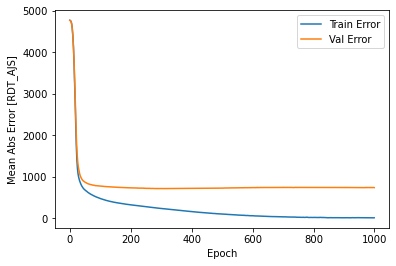

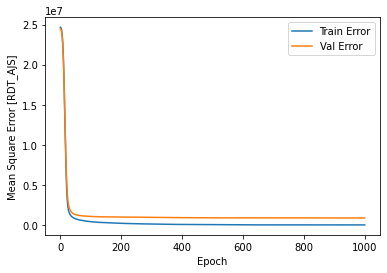

In [249]:
plot_history(history)

In [250]:
# Finalmente se realizan las predicciónes
test_predictions = model_completed.predict(normed_test_data).flatten()
test_predictions

array([8098.5337, 5989.9556, 5558.903 , 5169.805 , 5584.263 , 7320.725 ,
       4453.9087, 4939.031 , 4874.869 , 3373.743 , 3536.4148, 4648.2085,
       5803.6265, 4645.7476, 4190.595 , 2812.0964, 4399.523 , 3446.0627,
       6520.056 , 5637.09  , 6035.565 , 5607.1387, 5912.8555, 5234.281 ,
       4340.213 , 4881.6313, 3968.1865, 3625.303 , 5890.8174, 4226.18  ,
       5649.149 , 4366.4624, 5574.8667, 3979.0144, 5603.0107,       nan,
       7381.32  , 3058.1023, 5711.826 , 5354.56  , 3642.351 , 1974.4154,
       2873.4167, 3914.22  , 7055.2456, 5482.7046, 4873.5396, 4861.2944,
       5033.472 , 5214.395 , 2753.099 , 2075.513 , 6986.4575, 1580.03  ,
       4260.566 , 3952.7864, 4710.143 , 2727.0732, 2770.3728, 2544.5557,
        639.4595, 5859.549 , 5914.797 , 4825.861 , 3925.9734, 5245.7427,
       6144.221 , 4164.159 , 4195.9653, 4988.011 , 6066.66  , 3490.475 ,
       4877.4224, 4294.8047, 2817.6133, 1870.5122, 2915.1091, 3453.4836,
       5919.345 , 7237.4136, 5229.1543, 3695.3403, 

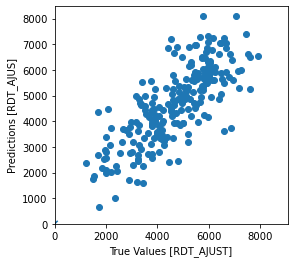

In [251]:
# Grafico valores predichos vs Valore reales
plt.scatter(y_test, test_predictions)
plt.xlabel('True Values [RDT_AJUST]')
plt.ylabel('Predictions [RDT_AJUS]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0,plt.xlim()[1]])
plt.ylim([0,plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])